In [8]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import pandas as pd

In [9]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '\images'
data_dir_list = os.listdir(data_path)

    

In [10]:
import csv
from os.path import splitext
img_rows=128
img_cols=128
num_channel=1
num_epoch=20
data_path_label = PATH + '\styles.csv'
print(data_path_label)
styledf=pd.read_csv(data_path_label)


C:\Users\rohit\Downloads\styles.csv


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


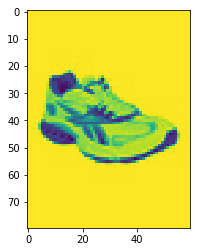

In [71]:

# Define the number of classes
num_classes = 4


count = 0
flag = True
if(flag==True):
    
    img_data_list=[]
    labels_list = []
    imageDataframe  = pd.DataFrame(columns=['id', 'colorcode'])
    for img in data_dir_list:
        count = count + 1
        print(count)
        input_img=cv2.imread(data_path + '/'+ img )
        plt.imshow(input_img)  
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        plt.imshow(input_img)  
        input_img = image.load_img(data_path + '/'+ img, target_size=(28,28,1), grayscale=True)        
       # input_img_resize=cv2.resize(input_img,(128,128))
        #value = input_img_resize.flatten()
        #rows = [(splitext(img)[0]), input_img ]
        #input_img_resize = np.expand_dims(input_img_resize, axis=0)
        img_data_list.append(input_img)
        imageDataframe = imageDataframe.append({'id': splitext(img)[0], 'colorcode': input_img}, ignore_index=True)
        if count > 1000:
            break

In [72]:
data_path_label = PATH + '\styles.csv'
print(data_path_label)
styledf=pd.read_csv(data_path_label)
styledf.sort_values("id", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
styledf

C:\Users\rohit\Downloads\styles.csv


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
12904,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011.0,Sports,Nike Sahara Team India Fanwear Round Neck Jersey,NaN,NaN
12627,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,2015.0,Sports,Nike Men Blue T20 Indian Cricket Jersey,NaN,NaN
16357,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,2013.0,Sports,Nike Mean Team India Cricket Jersey,NaN,NaN
9208,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010.0,Casual,Puma Deck Navy Blue Backpack,NaN,NaN
33222,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010.0,Sports,Puma Big Cat Backpack Black,NaN,NaN
32390,1528,Men,Apparel,Topwear,Jackets,Black,Fall,2010.0,Sports,Puma Men Ferrari Black Fleece Jacket,NaN,NaN
29875,1529,Men,Apparel,Topwear,Tshirts,Red,Fall,2010.0,Casual,Ferrari Tee,NaN,NaN
15795,1530,Men,Apparel,Topwear,Jackets,Red,Fall,2010.0,Sports,Puma Men Ferrari Track Jacket,NaN,NaN
13278,1531,Men,Apparel,Topwear,Tshirts,Grey,Fall,2010.0,Casual,Puma Men Grey Solid Round Neck T-Shirt,NaN,NaN
34437,1532,Men,Apparel,Topwear,Tshirts,Grey,Fall,2010.0,Casual,Puma Men Grey Leaping Cat T-shirt,NaN,NaN


In [73]:
imageDataframe

,id,colorcode
0,10000,<PIL.Image.Image image mode=L size=28x28 at 0x...
1,10001,<PIL.Image.Image image mode=L size=28x28 at 0x...
2,10002,<PIL.Image.Image image mode=L size=28x28 at 0x...
3,10003,<PIL.Image.Image image mode=L size=28x28 at 0x...
4,10004,<PIL.Image.Image image mode=L size=28x28 at 0x...
5,10005,<PIL.Image.Image image mode=L size=28x28 at 0x...
6,10006,<PIL.Image.Image image mode=L size=28x28 at 0x...
7,10007,<PIL.Image.Image image mode=L size=28x28 at 0x...
8,10008,<PIL.Image.Image image mode=L size=28x28 at 0x...
9,10009,<PIL.Image.Image image mode=L size=28x28 at 0x...


In [74]:
styledf.dtypes
imageDataframe["id"]= imageDataframe["id"].astype(int)
imageDataframe.dtypes

id            int32
colorcode    object
dtype: object

In [89]:
#print(pd.concat([imageDataframe, styledf], axis=1, join_axes=[imageDataframe.id]))
df = pd.merge(styledf,
                 imageDataframe[['id', 'colorcode']],
                 on='id')
colorframe = imageDataframe['colorcode']
myarray = np.asarray(colorframe)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df)

        id  gender masterCategory subCategory   articleType    baseColour  \
0    10000   Women        Apparel  Bottomwear        Skirts         White   
1    10001   Women        Apparel  Bottomwear        Skirts          Blue   
2    10002   Women        Apparel  Bottomwear        Skirts          Blue   
3    10003   Women        Apparel     Topwear       Tshirts         White   
4    10004     Men        Apparel  Bottomwear        Shorts          Grey   
5    10005     Men        Apparel     Topwear       Tshirts          Blue   
6    10006     Men        Apparel     Topwear       Tshirts         Black   
7    10007   Women        Apparel     Topwear       Tshirts         White   
8    10008     Men        Apparel     Topwear       Tshirts     Navy Blue   
9    10009     Men        Apparel     Topwear       Tshirts           Red   
10   10010     Men        Apparel     Topwear       Tshirts         Black   
11   10011     Men        Apparel  Bottomwear   Track Pants  Grey Melange   

In [76]:
from keras.preprocessing import image
train_image = []
count = -1
for i in df['colorcode']:
        print(i)
        img = i
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    
X = np.array(train_image)
#img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
#img_data /= 255
#print (img_data.shape)
X.shape

<PIL.Image.Image image mode=L size=28x28 at 0x1527C7EB630>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7EBC88>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7F4320>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7F4978>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7F4FD0>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7FD5F8>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7FDBE0>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C7FDEF0>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C8097F0>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C809DD8>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C814400>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C8149E8>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C814E10>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C81D710>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C81DCF8>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C829320>
<PIL.Image.Image image mode=L size=28x28 at 0x1527C82990

(101, 28, 28, 1)

In [124]:

labels = df['articleType']


In [160]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

encoded_data, mapping_index = pd.Series(labels).factorize()
s = pd.Series(labels, dtype="category")
y = pd.factorize(s)[0]
d = pd.factorize(s)
print(encoded_data)
print(mapping_index)

[ 0  0  0  1  2  1  1  1  1  1  1  3  3  1  4  1  5  6  2  1  2  2  1  3
  1  1  1  1  1  7  1  1  1  2  1  8  8  8  1  1  1  1  1  1  1  1  1  1
  1  9  2  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  8 11  8  8  8 12  8  8  8  8  8  8  8 13 13  8  8  8 13 13 13 13
 13  8  8  8  8]
Index(['Skirts', 'Tshirts', 'Shorts', 'Track Pants', 'Caps', 'Dresses',
       'Jackets', 'Sweatshirts', 'Sports Shoes', 'Shirts', 'Tracksuits',
       'Sandals', 'Flip Flops', 'Watches'],
      dtype='object')


In [130]:
label = np.array(y)
# print the count of number of samples for different classes
print(np.unique(label,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64), array([ 3, 53,  6,  3,  1,  1,  1,  1, 21,  1,  1,  1,  1,  7],
      dtype=int64))


IndexError: index 12 is out of bounds for axis 1 with size 12

In [111]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = y
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
Y = onehot_encoded
print(integer_encoded)

[ 0  0  0  1  2  1  1  1  1  1  1  3  3  1  4  1  5  6  2  1  2  2  1  3
  1  1  1  1  1  7  1  1  1  2  1  8  8  8  1  1  1  1  1  1  1  1  1  1
  1  9  2  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  8 11  8  8  8 12  8  8  8  8  8  8  8 13 13  8  8  8 13 13 13 13
 13  8  8  8  8]
[[ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 4]
 [ 1]
 [ 5]
 [ 6]
 [ 2]
 [ 1]
 [ 2]
 [ 2]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 7]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 8]
 [ 8]
 [ 8]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 9]
 [ 2]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 8]
 [11]
 [ 8]
 [ 8]
 [ 8]
 [12]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [13]
 [13]
 [ 8]
 [ 8]
 [ 8]
 [13]
 [13]
 [13]
 [13]
 [13]
 [ 8]
 [ 8]
 [ 8]
 [ 8]]


C:\Users\rohit\Miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [131]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [168]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
# Define the model structure
model = Sequential()
model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(14))
model.add(Activation('softmax'))

C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="same")`
  """
C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


In [121]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [169]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])
#model.fit(X_train, y_train, batch_size=30, nb_epoch=num_epoch, verbose=1)

In [170]:
model.fit(X_train, y_train, batch_size=30, nb_epoch=num_epoch, verbose=1)

C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
80/80 [==============================] - 3s 34ms/step - loss: 2.5533 - acc: 0.2125
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 2.0791 - acc: 0.4375
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 2.0837 - acc: 0.5000
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 1.9013 - acc: 0.4875
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 1.8081 - acc: 0.4500
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: 1.9239 - acc: 0.4375
Epoch 7/20
80/80 [==============================] - 0s 3ms/step - loss: 1.8482 - acc: 0.4500
Epoch 8/20
80/80 [==============================] - 0s 3ms/step - loss: 1.9388 - acc: 0.4250
Epoch 9/20
80/80 [==============================] - 0s 2ms/step - loss: 1.8009 - acc: 0.4875
Epoch 10/20
80/80 [==============================] - 0s 2ms/step - loss: 1.8080 - acc: 0.4750
Epoch 11/20
80/80 [==============================] - 0s 2ms/step - l

In [48]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined

In [171]:
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)


Train on 80 samples, validate on 21 samples
Epoch 1/20
48/80 [=================>............] - ETA: 0s - loss: 1.5829 - acc: 0.5208

C:\Users\rohit\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


80/80 [==============================] - 1s 12ms/step - loss: 1.5889 - acc: 0.5250 - val_loss: 1.5509 - val_acc: 0.6667

Epoch 00001: val_loss improved from inf to 1.55093, saving model to Best-weights-my_model-001-1.5889-0.5250.hdf5
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 1.5967 - acc: 0.6250 - val_loss: 1.4539 - val_acc: 0.7143

Epoch 00002: val_loss improved from 1.55093 to 1.45387, saving model to Best-weights-my_model-002-1.5967-0.6250.hdf5
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 1.5951 - acc: 0.6375 - val_loss: 1.6393 - val_acc: 0.7143

Epoch 00003: val_loss did not improve from 1.45387


In [172]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)


In [173]:

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('lossscore = model.evaluate(X_test, y_test, show_accuracy=True, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

SyntaxError: EOL while scanning string literal (<ipython-input-173-25b0abd4db6a>, line 6)

In [183]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


Test Loss: 1.639301061630249
Test accuracy: 0.7142857313156128


In [185]:
test_image = X_test[0:1]
print (test_image)

[[[[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [

In [176]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

[[0.05783936 0.1436141  0.05188334 0.04238639 0.0435017  0.0509073
  0.04435759 0.03174823 0.24284865 0.04886975 0.04312973 0.0592601
  0.05596535 0.08368839]]
[8]
[8]


In [177]:
print(test_image)

[[[[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [

(1, 28, 28, 1)


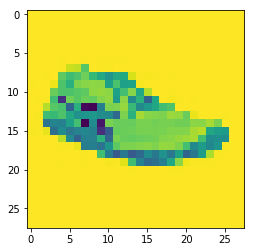

In [186]:
import matplotlib.pyplot as plt

sample = []
test_image=cv2.imread(data_path + '/'+ '59263.jpg' )
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = image.load_img(data_path + '/'+ '10097.jpg', target_size=(28,28,1), grayscale=True)

plt.imshow(test_image)  
test_image = image.img_to_array(test_image)
test_image = test_image/255
sample.append(img)
Z = np.array(sample)
print (Z.shape)





In [187]:
# Predicting the test image
print((model.predict(Z)))
print(model.predict_classes(Z))

[[0.0574969  0.1426221  0.05886078 0.04488558 0.04358381 0.05326067
  0.04631877 0.03179078 0.23122744 0.04587569 0.04523674 0.06019296
  0.05426485 0.08438295]]
[8]
